In [51]:
print(1)

1


# Task 1 - Find the diabetic and hight blood pressure patients across all age groups, and conclude the risk heart stroke is higher in which age group

In [52]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt 

#read the csv
df = pd.read_csv('heart_disease.csv')
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [53]:
#Filter by diabetes(condition will be who has diabetes) and create new dataframe
diabetes = df.loc[df["diabetes"] == 1]
diabetes

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1
19,48.0,1,582,1,55,0,87000.0,1.9,121,0,0,15,1
21,65.0,1,128,1,30,1,297000.0,1.6,136,0,0,20,1
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [54]:
#On this new data frame perform group operation as per age and create new dataframe 
diabetes = diabetes.groupby("age")["diabetes"].count().reset_index().sort_values(by="age")

In [55]:
#Filter by high_blood_pressure(condition will be who has high_blood_pressure) and create new dataframe

highBP = df.loc[df["high_blood_pressure"] == 1]
highBP

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,52.0,1,191,1,30,1,334000.00,1.0,142,1,1,216,0
257,58.0,0,132,1,38,1,253000.00,1.0,139,1,0,230,0
270,44.0,0,582,1,30,1,263358.03,1.6,130,1,1,244,0
275,45.0,0,582,0,38,1,422000.00,0.8,137,0,0,245,0


In [56]:
#On this new data frame perform group operation as per age and create new dataframe 
highBP = highBP.groupby("age")["high_blood_pressure"].count().reset_index().sort_values(by="age")



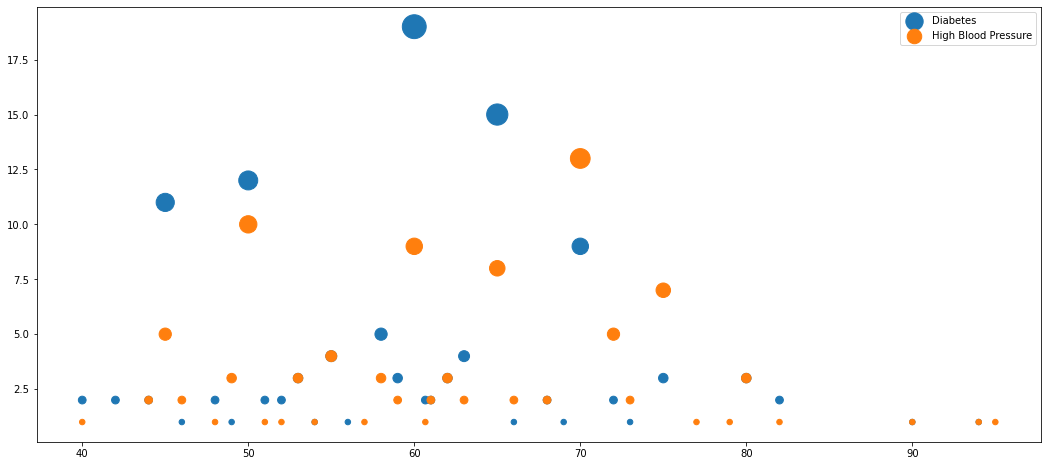

In [57]:
#plot the scatter graph to show which age group is more prone to diabetes
plt.figure(figsize=(18,8))
plt.scatter(diabetes["age"], diabetes["diabetes"], label="Diabetes", s=diabetes["diabetes"]*30)
plt.scatter(highBP["age"], highBP["high_blood_pressure"], label="High Blood Pressure", s=highBP["high_blood_pressure"]*30)
plt.legend()
plt.show()

Conclusion - 

# Task 2 - Find as per gender who has not normal platelets level in blood

In [63]:
#Filter by platelets(condition lesser then 150000 OR greater then 450000) and create new dataframe
normalPlatelets = df.loc[(df["platelets"] <= 150000) | (df["platelets"] >= 450000)]
normalPlatelets = normalPlatelets.groupby('gender')["platelets"].count().reset_index()
normalPlatelets


,gender,platelets
0,0,11
1,1,30


([<matplotlib.patches.Wedge at 0x20cabb92430>,
 [Text(0.7318582383021073, 0.8212085721845188, '0'),
  Text(-0.7318581614150086, -0.8212086407060286, '1')],
 [Text(0.3991954027102403, 0.4479319484642829, '26.829%'),
  Text(-0.3991953607718228, -0.44793198583965194, '73.171%')])

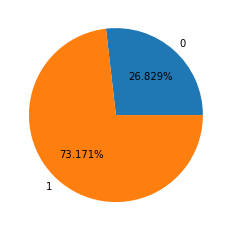

In [64]:
#Plot a pie chart as per the gender to show the percentage of male and female who has not normal platelets
plt.pie(normalPlatelets["platelets"], labels=normalPlatelets["gender"], autopct="%0.3f%%")